# Concevoir une application au service de la santé publique (notebook 1/2)

# Idée d'application:
MyNutriscore:
une application qui permet de connaitre le nova score des produits selon les features

Comment?

1. on rentre les données des produits

2. on a le nova group



# Nettoyage du dataset

In [1]:
#importons les librairies principales pour le calcul et le nettoyage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno as msn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# chargeons les données
data=pd.read_csv("/content/drive/MyDrive/OC: Data Science/Datasets/Projet 3/openfood_OC.csv", sep = '\t')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# visulaisons si les données sont bien chargées et a quoi cela ressemble
pd.set_option("display.max_columns", 200)
data.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_en,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,food_groups_tags,food_groups_en,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0729950200110,http://world-en.openfoodfacts.org/product/0729...,usda-ndb-import,1489137181,2017-03-10T09:13:01Z,1637334604,2021-11-19T15:10:04Z,Plantain Chips,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Top Banana,top-banana,"Plantain chips, Chips","en:chips,en:plantain-chips","Chips,Plantain-chips",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States,"Plantains, vegetable oil (cotton seed oil and/...",NaN,NaN,NaN,NaN,NaN,28 g (32 CHIPS) | (ABOUT),28.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,11.0,d,3.0,unknown,unknown,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,en:plantain-chips,P

In [5]:
# nombre de lignes et de colonnes
data.shape

(800000, 191)

In [7]:
def description(df): #Definir une fonction "description"
    
    print(f"nb de lignes {df.shape[0]} et le nb de colonnes {df.shape[1]}")  #Affinche le nombre des lignes et des colonnes
    print(" ")
    print("-------les informations de notre dataframe-------")
    print(df.info())  #Affiche les informations de notre Dataframe
    print(" ")
    print('-------Histogramme des valeurs manquantes-------')
    print(plt.hist(df.isnull().sum()))  #Affiche un histogramme de la comme des valeurs manquantes
    print(plt.title("somme des valeurs manquantes"))
    print(" ")
    
    print('-------Description statistiques-------')
    return(df.describe(include="all"))

In [8]:
def valeurs_manquantes(df):  # Definir une fonction pour afficher les valeurs manquantes ainsi que les détails

    total = df.isnull().sum()   # Calcul du total des valeurs manquantes
    percent = round(df.isnull().sum()/df.isnull().count()*100,2) # Calcul le pourcentage des valeurs 

    valeurs_manquantes = pd.concat([total,percent],axis =1, keys=['Total','Ratio_of_NA(%)'])   # Total des valeurs manquantes et le ration en %
    tp=pd.DataFrame(df[valeurs_manquantes.index].dtypes, columns=['Types'])
    valeurs_manquantes=pd.concat([valeurs_manquantes,tp],axis=1)
    valeurs_manquantes=valeurs_manquantes.sort_values('Total',ascending=False)
    valeurs_manquantes.head(20)

    print('\033[1m'+ "le total des valeurs manquantes est"+'\033[0m', total.sum()) #Affiche la somme totale des valeurs manquantes
    print( percent) #affiche le poucentage

    print(valeurs_manquantes.head(20)) 
    print()
    print(set(valeurs_manquantes['Types']))
    print()
    print('\033[1m'+ "---Categorical columns---" +'\033[0m')
   
    print(valeurs_manquantes[valeurs_manquantes['Types']=="object"].index) # Colonnes ayant des variables qualitatives
    print("Nombre des colonnes:",len(valeurs_manquantes[valeurs_manquantes['Types']=="object"].index))
    print()
    print('\033[1m'+ "---Numerical columns----" +'\033[0m')
   
    print(valeurs_manquantes[valeurs_manquantes['Types'] !="object"].index)  # Colonnes ayant des variables quantitatives
    print("Nombre des colonnes:", len(valeurs_manquantes[valeurs_manquantes['Types']!="object"].index))
    print()

   

nb de lignes 800000 et le nb de colonnes 191
 
-------les informations de notre dataframe-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 191 entries, code to carnitine_100g
dtypes: category(5), float64(123), int64(2), object(61)
memory usage: 1.1+ GB
None
 
-------Histogramme des valeurs manquantes-------
(array([ 16.,   0.,  11.,   0.,   2.,   7.,  14.,   9.,  12., 120.]), array([     0.,  80000., 160000., 240000., 320000., 400000., 480000.,
       560000., 640000., 720000., 800000.]), <a list of 10 Patch objects>)
Text(0.5, 1.0, 'somme des valeurs manquantes')
 
-------Description statistiques-------


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_en,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,food_groups_tags,food_groups_en,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,800000,800000,799999,8.000000e+05,800000,8.000000e+05,800000,768920,2865,46099,204362,120108,120106,120106,3718,399471,399445,361375,361371,361371,34167,34109,34109,49135,49113,166553,166542,166542,47014,47001,27693,0.0,29924,60621,106198,797700,797699,797699,273778,72703,0.0,39982,49366,49366,191377,1.899290e+05,0.0,273779.000000,2,157810,157810,273779.000000,0.0,5339,273779.000000,0.0,16166,278575.000000,278575,244167.0,799892,799892,295412,295412,295412,800000,800000,800000,106256,186319.000000,186319,361371,361371,622883,622883,267560,267560,431397,431397,5.806300e+04,6.163160e+05,6.342850e+05,368.000000,6.310520e+05,6.141980e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17737.000000,17721.000000,830.000000,0.0,0.0,0.0,204.000000,0

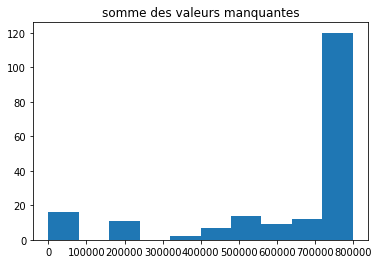

In [9]:
description(data)

In [10]:
valeurs_manquantes(data)

le total des valeurs manquantes est 121855887
code                    0.00
url                     0.00
creator                 0.00
created_t               0.00
created_datetime        0.00
                       ...  
choline_100g          100.00
phylloquinone_100g     99.92
beta-glucan_100g      100.00
inositol_100g         100.00
carnitine_100g        100.00
Length: 191, dtype: float64
                                        Total  Ratio_of_NA(%)    Types
-lignoceric-acid_100g                  800000           100.0  float64
no_nutriments                          800000           100.0  float64
-eicosapentaenoic-acid_100g            800000           100.0  float64
-alpha-linolenic-acid_100g             800000           100.0  float64
-melissic-acid_100g                    800000           100.0  float64
-montanic-acid_100g                    800000           100.0  float64
-cerotic-acid_100g                     800000           100.0  float64
-behenic-acid_100g                     

In [11]:
data.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutriscore_score,ecoscore_score_fr,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,8.000000e+05,8.000000e+05,0.0,0.0,1.899290e+05,0.0,273779.000000,273779.000000,0.0,273779.000000,0.0,278575.000000,186319.000000,5.806300e+04,6.163160e+05,6.342850e+05,368.000000,6.310520e+05,6.141980e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17737.000000,17721.000000,830.000000,0.0,0.0,0.0,204.000000,0.0,0.0,0.0,0.0,43.000000,0.0,0.0,0.0,0.0,0.0,0.0,96920.000000,98505.000000,6.308510e+05,6.240400e+05,0.0,0.0,0.0,0.0,0.0,0.0,207.000000,1389.000000,2.195070e+05,1294.000000,1188.000000,6.315590e+05,22.000000,44.000000,20.000000,5.854130e+05,5.854120e+05,8.979000e+03,77889.000000,25.000000,3729.000000,1359.000000,449.000000,80710.000000,8805.000000,8421.000000,8812.000000,5941.000000,3895.000000,3082.000000,4.792000e+03,443.000000,2351.000000,67.000000,157.000000,33816.000000,307.000000,9.920300e+04,5153.000000,97056.000000,5371.000000,3.790000e+03,1570.000000,1454.000000,147.000000,940.000000,81.000000,131.000000,904.000000,216.000000,100.000000,84.000000,3608.000000,316.000000,4366.000000,273316.000000,99.000000,2407.000000,1.000,159.000000,4380.000000,278578.000000,4.000000,2.000000,1.0,27.000000,624.000000,10.00000,29.000000,16.000000
mean,1.567456e+09,1.607989e+09,NaN,NaN,4.541139e+07,NaN,2.019019,0.019750,NaN,0.069965,NaN,9.121296,43.360366,1.147987e+38,1.765230e+08,1.050878e+37,332.319837,1.744705e+08,1.627096e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.069582,6.073411,40.160924,NaN,NaN,NaN,55.801434,NaN,NaN,NaN,NaN,465.545489,NaN,NaN,NaN,NaN,NaN,NaN,0.122302,0.056417,1.584378e+05,1.604063e+08,NaN,NaN,NaN,NaN,NaN,NaN,25.874879,34.066034,4.552631e+05,2.422898,4.367685,1.582406e+05,3.008146,24.228654,6.076037,1.707070e+05,6.828290e+04,5.568549e+1

Nous remarquons que nous avons beaucoup de valeurs manquantes 
d'ailleurs plus de 120 colonnes ont plus de 70% de valeurs manquantes



In [12]:
#valeurs dupliquées
data.duplicated().sum()

0

Nous n'avons pas de valeurs dupliquées

Avant de retirer les valeurs avec plus de 70% de valeurs manquantes, on va homogénéiser les types de colonnes

In [13]:
data['nova_group']= data['nova_group'].astype('category') #changer le type de float a category
data["nutriscore_grade"] =  data["nutriscore_grade"].astype("category") #changer le type de float a category
data["pnns_groups_1"] = data["pnns_groups_1"].astype('category')
data["pnns_groups_2"] = data["pnns_groups_2"].astype('category')
data["food_groups"] = data["food_groups"].astype('category')
data["pnns_groups_1"] = data["pnns_groups_1"] .str.lower() #ecrire de la même facon tous les groupes 
data["pnns_groups_2"] = data["pnns_groups_2"] .str.lower()#ecrire de la même facon tous les groupes 
data["food_groups"] = data["food_groups"].str.replace("en:", "") #retirer le "en" au debut des cellules
data["food_groups"] = data["food_groups"].str.replace("-", " ")#remplacer le "-" au debut des cellules

# Traitement des valeurs manquantes

Avant de commencer le traitement des valeurs manquantes en approfondis tout d'abord nous allors retirer les colonnes avec plus de 70% de valeurs manquantes

In [14]:
# supprimons les colonnes avec plus de 70% de valeurs manquantes:
for x in data.columns:
  if data[x].isnull().mean() > 0.7 :
    del data[x]

In [15]:
data.shape

(800000, 50)

Apres la suppression des colonnes a plus de 70% de valeurs manquantes, nous avons un nouveau dataframe avec 50 colonnes.

Analysons ce nouveau dataframe:

In [16]:
def msn_matrix(df): #definir une focntion pour afficher une heatmap des valeurs manquantes
  df_isna=df.isna()
  fig, ax=plt.subplots(figsize =(10,5))
  sns.heatmap(df_isna, cbar = False, cmap = "gray")
  ax.xaxis.set_ticks_position('top')
  plt.setp(ax.get_xticklabels(), rotation = 90)
  custom_ticks = np.linspace(0, df_isna.shape[0], 3, dtype = int)
  ax.set_yticks(custom_ticks)
  ax.set_yticklabels(custom_ticks)
  plt.show()

**Choix de nos colonnes catégories:**

 *on retire les colonnes qui ne sont que repetitive

 *on retire les colonnes avec des valeurs uniques superieures à 50

 *on garde les colonnes "ingredient text", "pnns_groups 1 &2 " et food groups




In [17]:
#comparaison entre les colonnes "categories" et "categories_en"
print(" la somme des valeurs manquantes dans la colonne categories:" ,data['categories'].isnull().sum(),"\n","la somme des valeurs manquantes dans la colonne categories en anglais:" , data['categories_en'].isnull().sum())

 la somme des valeurs manquantes dans la colonne categories: 438625 
 la somme des valeurs manquantes dans la colonne categories en anglais: 438629


In [18]:
print(" la somme des valeurs manquantes dans la colonne categories:" ,data['categories'].nunique(),"\n","la somme des valeurs manquantes dans la colonne categories en anglais:" , data['categories_en'].nunique())

 la somme des valeurs manquantes dans la colonne categories: 64744 
 la somme des valeurs manquantes dans la colonne categories en anglais: 38131


In [19]:
#comparaison entre les colonnes "countries" et "countries_en"
print(" la somme des valeurs manquantes dans la colonne countries:" ,data['countries'].isnull().sum(),"\n","la somme des valeurs manquantes dans la colonne countries en anglais:" , data['countries_en'].isnull().sum())

 la somme des valeurs manquantes dans la colonne countries: 2300 
 la somme des valeurs manquantes dans la colonne countries en anglais: 2301


Nous remarquons que les colonnes "x" et "x_en" sont quasiment les memes 
==> on retire toutes les colonnes "x_en"


In [20]:
# Affiche le nombre des valeurs uniques 
for x in ['ingredients_text', 'nutriscore_grade', 'food_groups', 'main_category',
       'categories', 'brands', 'product_name', 'countries', 'pnns_groups_2',
       'pnns_groups_1', 'creator', 'states', 'code']:
  print(" le nombre des valeurs dans la colonne",x,":" ,data[x].nunique(),"\n")  

 le nombre des valeurs dans la colonne ingredients_text : 244293 

 le nombre des valeurs dans la colonne nutriscore_grade : 5 

 le nombre des valeurs dans la colonne food_groups : 46 

 le nombre des valeurs dans la colonne main_category : 18849 

 le nombre des valeurs dans la colonne categories : 64744 

 le nombre des valeurs dans la colonne brands : 98093 

 le nombre des valeurs dans la colonne product_name : 555455 

 le nombre des valeurs dans la colonne countries : 6459 

 le nombre des valeurs dans la colonne pnns_groups_2 : 41 

 le nombre des valeurs dans la colonne pnns_groups_1 : 11 

 le nombre des valeurs dans la colonne creator : 8792 

 le nombre des valeurs dans la colonne states : 3542 

 le nombre des valeurs dans la colonne code : 799996 



Nous supprimons les colonnes categorielles avec plus de 50 valeurs uniques.
Nous gardons la colonne "ingredients_text" vu que nous allons en avoir besoin pour notre application.

Pour les colonnes "url" et "images" nous n'en avons pas besoin pour notre analyse

nb de lignes 800000 et le nb de colonnes 21
 
-------les informations de notre dataframe-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count   Dtype   
---  ------                                                 --------------   -----   
 0   ingredients_text                                       273778 non-null  object  
 1   additives_n                                            273779 non-null  float64 
 2   ingredients_from_palm_oil_n                            273779 non-null  float64 
 3   ingredients_that_may_be_from_palm_oil_n                273779 non-null  float64 
 4   nutriscore_score                                       278575 non-null  float64 
 5   nutriscore_grade                                       278575 non-null  category
 6   nova_group                                             244167 non-null  category
 7   pnns_groups_1 

,ingredients_text,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
count,273778,273779.000000,273779.000000,273779.000000,278575.000000,278575,244167.0,799892,799892,295412,6.163160e+05,6.342850e+05,6.310520e+05,6.141980e+05,6.308510e+05,6.240400e+05,6.315590e+05,5.854130e+05,5.854120e+05,273316.000000,278578.000000
unique,244293,NaN,NaN,NaN,NaN,5,4.0,11,41,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,"Carbonated water, natural flavor.",NaN,NaN,NaN,NaN,d,4.0,unknown,unknown,sweets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,169,NaN,NaN,NaN,NaN,86315,159918.0,506916,506916,27433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.019019,0.019750,0.069965,9.121296,NaN,NaN,NaN,NaN,NaN,1.765230e+08,1.050878e+37,1.744705e+08,1.627096e+05,1.584378e+05,1.604063e+08,1.582406e+05,1.707070e+05,6.828290e+04,8.572664,9.121391
std,NaN,2.884767,0.140938,0.303732,8.848561,NaN,NaN,NaN,NaN,NaN,1.278597e+11,8.369400e+39,1.384715e+11,1.275127e+08,1.258185e+08,1.265884e+11,1.257479e+08,1.306100e+08,5.224406e+07,36.811276,8.848580
min,NaN,0.000000,0.000000,0.000000,-15.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-5.000000e+02,0.000000e+00,0.000000e+00,0.000000,-15.000000
25%,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.010000e+02,4.180000e+02,8.000000e-01,1.000000e-01,3.521127e+00,6.000000e-01,1.330000e+00,8.250000e-02,3.300000e-02,0.000000,1.000000
50%,NaN,1.000000,0.000000,0.000000,10.000000,NaN,NaN,NaN,NaN,NaN,2.600000e+02,1.080000e+03,7.000000e+00,1.800000e+00,1.540000e+01,3.570000e+00,6.000000e+00,5.875000e-01,2.350000e-01,0.000000,10.000000
75%,NaN,3.000000,0.000000,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN,4.000000e+02,1.674000e+03,2.130000e+01,7.100000e+00,5.300000e+01,1.750000e+01,1.250000e+01,1.400000e+00,5.600000e-01,0.500000,16.000000


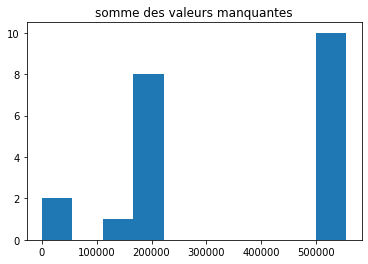

In [21]:
#Suppression des colonnes
del_col = ['url','created_t','main_category','categories', 'brands', 'product_name', 'countries', 'creator', 'states', 'code', 'created_datetime','last_modified_t', 'last_modified_datetime','brands_tags', 'categories_tags', 'categories_en','countries_tags', 'countries_en','food_groups_tags', 'food_groups_en','states_tags', 'states_en', 'main_category_en','image_url', 'image_small_url', 'image_ingredients_url','image_ingredients_small_url', 'image_nutrition_url','image_nutrition_small_url', ]
new_data = data.drop(del_col, axis = 1)
description(new_data)

## Traitement des valeurs manquantes des colonnes : pnns_groups_1, pnns_groups_2 et food_groups

In [22]:
for x in ["pnns_groups_1", "pnns_groups_2", "food_groups"]:
  print(x)
  print(data[x].unique()) 
  print("nombre des valeurs uniques:" , data[x].nunique())
  print("")


pnns_groups_1
['unknown' 'beverages' 'milk and dairy products' 'fish meat eggs'
 'fat and sauces' 'composite foods' 'sugary snacks' 'alcoholic beverages'
 'salty snacks' 'fruits and vegetables' 'cereals and potatoes' nan]
nombre des valeurs uniques: 11

pnns_groups_2
['unknown' 'teas and herbal teas and coffees' 'dairy desserts'
 'waters and flavored waters' 'fish and seafood' 'meat' 'cheese'
 'dressings and sauces' 'fruit juices' 'processed meat' 'one-dish meals'
 'biscuits and cakes' 'sweets' 'alcoholic beverages' 'sweetened beverages'
 'chocolate products' 'salty and fatty products' 'vegetables'
 'milk and yogurt' 'pizza pies and quiches' 'ice cream' 'bread'
 'fruit nectars' 'cereals' 'sandwiches' 'breakfast cereals'
 'plant-based milk substitutes' 'legumes' 'fruits' 'fats' 'dried fruits'
 'appetizers' 'unsweetened beverages' 'soups'
 'artificially sweetened beverages' 'eggs' 'potatoes' 'nuts' 'pastries'
 'offals' nan 'pizza pies and quiche']
nombre des valeurs uniques: 41

food_gro

In [23]:
#pnns_groups_1 en détail
top20_pnns = new_data[new_data["pnns_groups_1"].isin(new_data["pnns_groups_1"].value_counts(ascending=False).index[:20])]
print(top20_pnns["pnns_groups_1"].value_counts().reset_index())
px.pie(top20_pnns["pnns_groups_1"].value_counts().reset_index(),
      values=top20_pnns["pnns_groups_1"].value_counts().reset_index()["pnns_groups_1"],
      names=top20_pnns["pnns_groups_1"].value_counts().index,
      hole=0.3)
plt.savefig('pnns1 piechart.png')

                      index  pnns_groups_1
0                   unknown         506916
1             sugary snacks          60712
2            fish meat eggs          41401
3   milk and dairy products          36887
4      cereals and potatoes          33992
5            fat and sauces          28342
6                 beverages          26661
7     fruits and vegetables          22668
8           composite foods          21496
9              salty snacks          13673
10      alcoholic beverages           7144


<Figure size 432x288 with 0 Axes>

In [24]:
#pnns_groups_2 en détail
top20_pnns2 = new_data[new_data["pnns_groups_2"].isin(new_data["pnns_groups_2"].value_counts(ascending=False).index[:20])]
print(top20_pnns2["pnns_groups_2"].value_counts().reset_index())

px.pie(top20_pnns2["pnns_groups_2"].value_counts().reset_index(),
      values=top20_pnns2["pnns_groups_2"].value_counts().reset_index()["pnns_groups_2"],
      names=top20_pnns2["pnns_groups_2"].value_counts().index,
      hole=0.3)


                       index  pnns_groups_2
0                    unknown         506916
1                     sweets          27437
2         biscuits and cakes          24743
3       dressings and sauces          19841
4                     cheese          18446
5             one-dish meals          16453
6                    cereals          16277
7             processed meat          15377
8                       meat          12873
9            milk and yogurt          12744
10                vegetables          12272
11          fish and seafood          11148
12                     bread           8999
13       sweetened beverages           8689
14                      fats           8501
15       alcoholic beverages           7144
16                    fruits           6860
17        chocolate products           5859
18  salty and fatty products           5747
19                appetizers           4752


In [25]:
# food_groups en détail
top20_fg = new_data[new_data["food_groups"].isin(new_data["food_groups"].value_counts(ascending=False).index[:20])]
print(top20_fg["food_groups"].value_counts().reset_index())
px.pie(top20_fg["food_groups"].value_counts().reset_index(),
      values=top20_fg["food_groups"].value_counts().reset_index()["food_groups"],
      names=top20_fg["food_groups"].value_counts().index,
      hole=0.3)

                       index  food_groups
0                     sweets        27433
1         biscuits and cakes        24741
2       dressings and sauces        19833
3                     cheese        18438
4                    cereals        16269
5             one dish meals        16069
6             processed meat        15017
7            milk and yogurt        12650
8                 vegetables        12218
9           fish and seafood        10820
10       sweetened beverages         9766
11                     bread         8995
12                      fats         8498
13     unsweetened beverages         8148
14                   poultry         7472
15       alcoholic beverages         7119
16                    fruits         6846
17   meat other than poultry         6161
18        chocolate products         5855
19  salty and fatty products         5739


Concentrons nous sur les valeurs "unknown", des colonnes pnns_groups_1, pnns_groups_2 et food_groups

**Etapes à suivre :** 

1. Supprimer les lignes qui sont "unknown" pour les 3 colonnes,
2.  remplacer tous les "unknown" par des "nan"

In [26]:
#supprimer les lignes avec des valeurs 'unknown' pour les 3 colonnes
new_data.drop(new_data[(new_data['pnns_groups_1'] == 'unknown') & (new_data['pnns_groups_2'] == 'unknown')& (new_data['food_groups'] == 'unknown')].index, inplace=True)
new_data.shape

(799829, 21)

In [27]:
#remplacer toutes les valeurs "unknown " par des Nan
for y in ['pnns_groups_1', 'pnns_groups_2', 'food_groups']:
  new_data[y] = new_data[y].apply(lambda x:np.nan if x =='unknown'else x) #on remplace par des nan
  print(y)
  print(new_data[y].unique()) #on affiche les valeurs uniques
  print(new_data[y].nunique()) # on affiche le nombre des valeurs uniques
  print("--------------------------")

pnns_groups_1
[nan 'beverages' 'milk and dairy products' 'fish meat eggs'
 'fat and sauces' 'composite foods' 'sugary snacks' 'alcoholic beverages'
 'salty snacks' 'fruits and vegetables' 'cereals and potatoes']
10
--------------------------
pnns_groups_2
[nan 'teas and herbal teas and coffees' 'dairy desserts'
 'waters and flavored waters' 'fish and seafood' 'meat' 'cheese'
 'dressings and sauces' 'fruit juices' 'processed meat' 'one-dish meals'
 'biscuits and cakes' 'sweets' 'alcoholic beverages' 'sweetened beverages'
 'chocolate products' 'salty and fatty products' 'vegetables'
 'milk and yogurt' 'pizza pies and quiches' 'ice cream' 'bread'
 'fruit nectars' 'cereals' 'sandwiches' 'breakfast cereals'
 'plant-based milk substitutes' 'legumes' 'fruits' 'fats' 'dried fruits'
 'appetizers' 'unsweetened beverages' 'soups'
 'artificially sweetened beverages' 'eggs' 'potatoes' 'nuts' 'pastries'
 'offals' 'pizza pies and quiche']
40
--------------------------
food_groups
[nan 'teas and herba

In [28]:
list_global = list(set(new_data['food_groups']).intersection(set(new_data['pnns_groups_2'])))
list_global

[nan,
 'dairy desserts',
 'salty and fatty products',
 'vegetables',
 'milk and yogurt',
 'chocolate products',
 'potatoes',
 'sweetened beverages',
 'artificially sweetened beverages',
 'offals',
 'fish and seafood',
 'alcoholic beverages',
 'sweets',
 'fruit nectars',
 'legumes',
 'fruits',
 'soups',
 'unsweetened beverages',
 'breakfast cereals',
 'dressings and sauces',
 'teas and herbal teas and coffees',
 'fats',
 'sandwiches',
 'processed meat',
 'appetizers',
 'biscuits and cakes',
 'fruit juices',
 'nuts',
 'pizza pies and quiches',
 'dried fruits',
 'cheese',
 'ice cream',
 'waters and flavored waters',
 'bread',
 'pastries',
 'eggs',
 'cereals']

In [29]:
valeurs_manquantes(new_data)

le total des valeurs manquantes est 7915299
ingredients_text                                         65.78
additives_n                                              65.78
ingredients_from_palm_oil_n                              65.78
ingredients_that_may_be_from_palm_oil_n                  65.78
nutriscore_score                                         65.18
nutriscore_grade                                         65.18
nova_group                                               69.48
pnns_groups_1                                            63.37
pnns_groups_2                                            63.37
food_groups                                              63.09
energy-kcal_100g                                         22.95
energy_100g                                              20.71
fat_100g                                                 21.11
saturated-fat_100g                                       23.22
carbohydrates_100g                                       21.14
sugars_100g

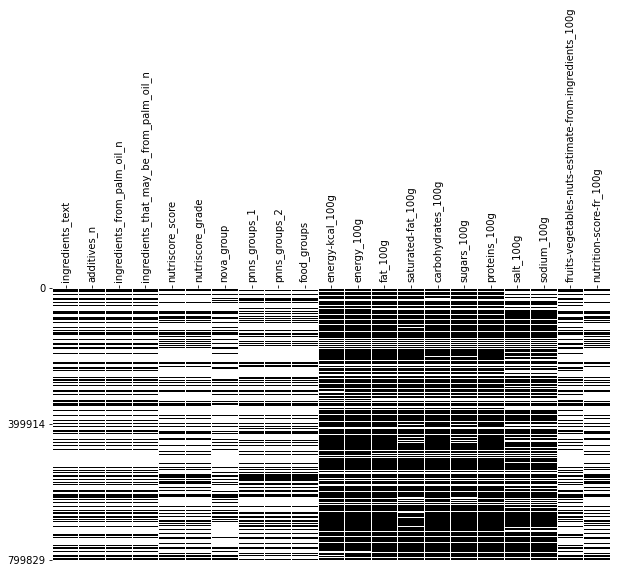

In [30]:
msn_matrix(new_data)


Nous remarquons que toutes les valeurs manquantes en food groups le sont aussi pour pnns_groups 1&2

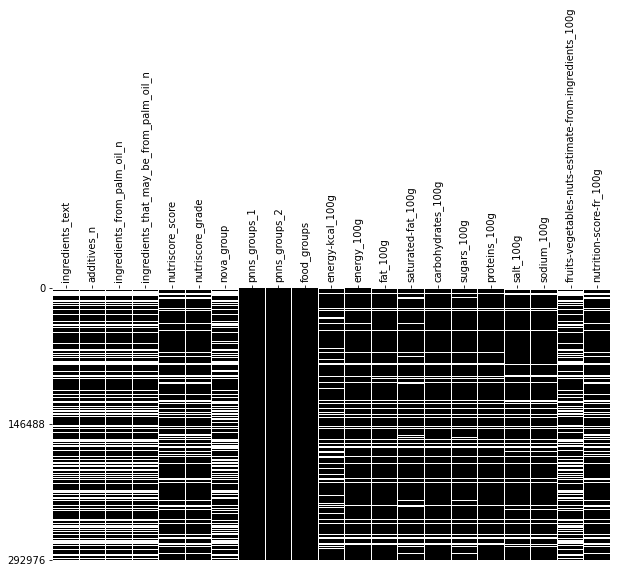

In [31]:
new_data = new_data.dropna(subset=['pnns_groups_2'])
msn_matrix(new_data)

In [32]:
new_data.shape

(292976, 21)

Arriver à un dataframe avec 292976 lignes alors qu'on avait 800000 n'est pas l'ideal.
Mais, nous sommes dans l'obligation de retirer les lignes qui sont nan pour pnns 1&2 groups et food groups, vu que ça n'aide pas avec l'analyse

In [33]:
#sauvegarde fichier
new_data.to_csv('/content/drive/MyDrive/OC: Data Science/Datasets/Projet 3/new_data.csv', index=False)

In [34]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292976 entries, 10 to 799999
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count   Dtype   
---  ------                                                 --------------   -----   
 0   ingredients_text                                       184186 non-null  object  
 1   additives_n                                            184186 non-null  float64 
 2   ingredients_from_palm_oil_n                            184186 non-null  float64 
 3   ingredients_that_may_be_from_palm_oil_n                184186 non-null  float64 
 4   nutriscore_score                                       231587 non-null  float64 
 5   nutriscore_grade                                       231587 non-null  category
 6   nova_group                                             176925 non-null  category
 7   pnns_groups_1                                          292976 non-null  object  
 8   pnns_groups_2          

In [35]:
df = pd.read_csv('/content/drive/MyDrive/OC: Data Science/Datasets/Projet 3/new_data.csv')

In [36]:
df.shape

(292976, 21)

<Figure size 1080x864 with 0 Axes>

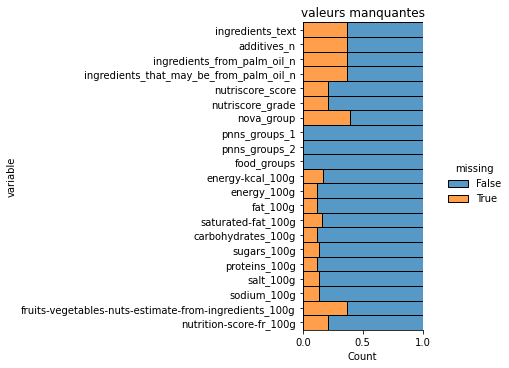

In [37]:
plt.figure(figsize=(15,12))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title('valeurs manquantes')
plt.show()

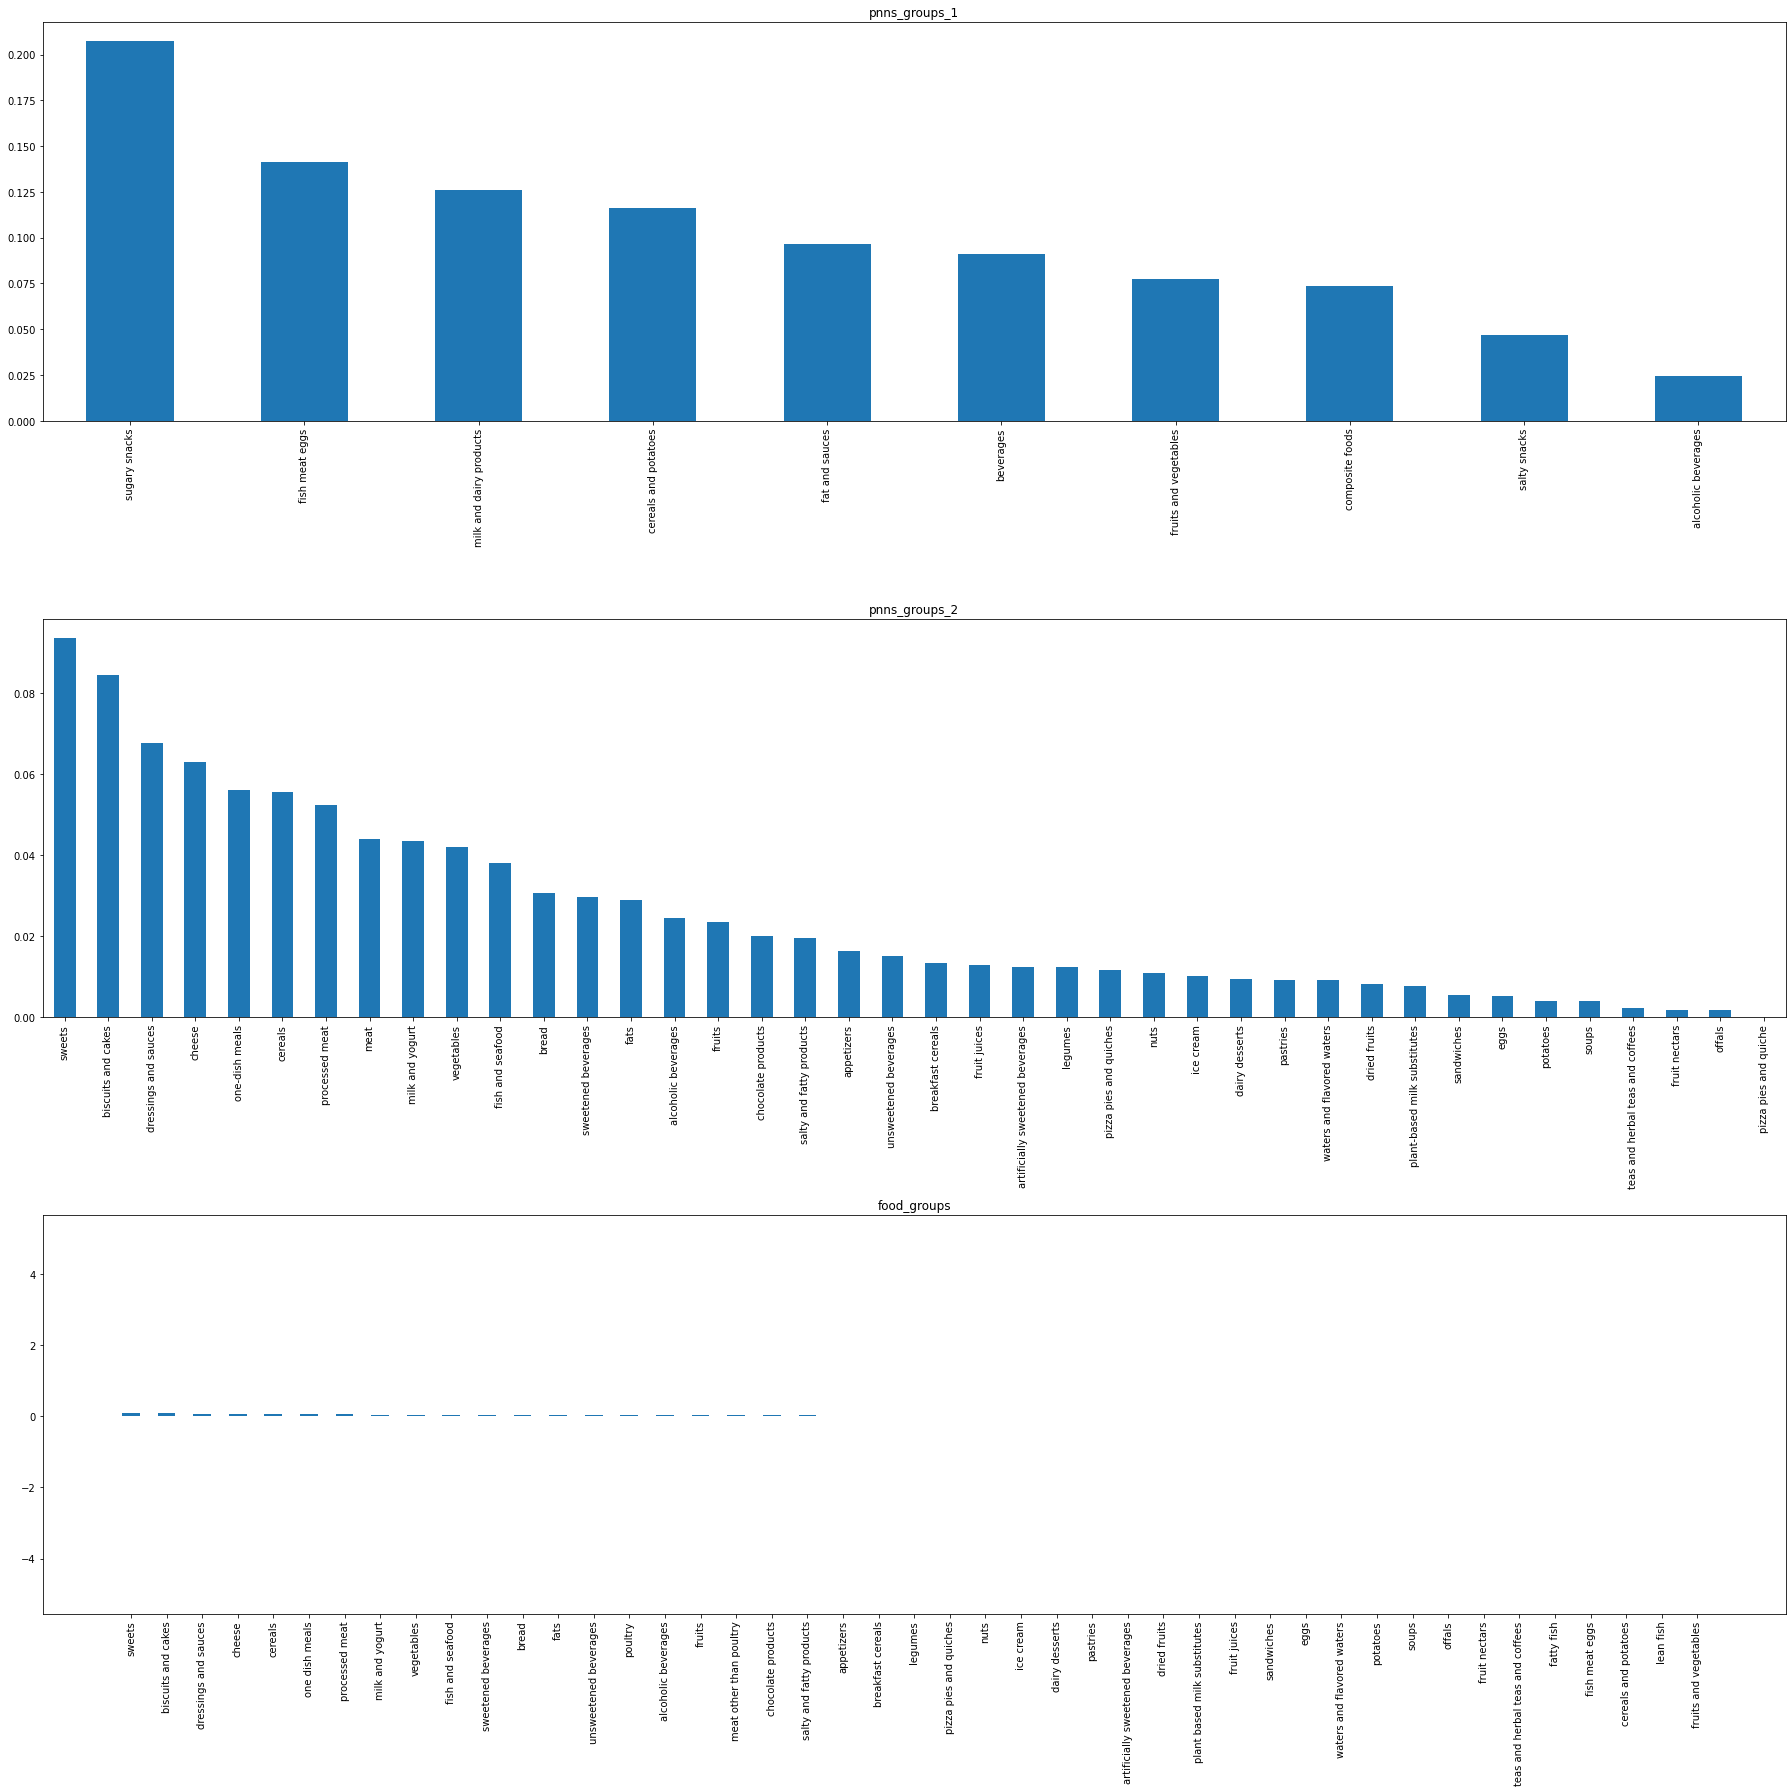

In [38]:
plt.figure(figsize=(25,25))

plt.subplot(3,1,1)
new_data['pnns_groups_1'].value_counts(normalize=True).plot(kind = 'bar')
plt.title("pnns_groups_1")

plt.subplot(3,1,2)
new_data['pnns_groups_2'].value_counts(normalize=True).plot(kind = 'bar')
plt.title("pnns_groups_2")


plt.subplot(3,1,3)
new_data['food_groups'].value_counts(normalize=True).plot(kind = 'bar')
plt.title("food_groups")


plt.axis('equal')
plt.tight_layout()
plt.show()

In [39]:
df['nova_group']= df['nova_group'].astype('category') #changer le type de float a category
df["nutriscore_grade"] =  df["nutriscore_grade"].astype("category") #changer le type de float a category
df["pnns_groups_1"] = df["pnns_groups_1"].astype('category')
df["pnns_groups_2"] = df["pnns_groups_2"].astype('category')
df["food_groups"] = df["food_groups"].astype('category')

## Traitement des valeurs manquantes dans les features

In [40]:
df.columns

Index(['ingredients_text', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'food_groups', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [41]:
features = ['energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g']

### Remplacement des NaN par la mediane 

In [42]:
#on remplace les nan par la mediane des features
col_map = {df[features].columns.get_loc(col):col for col in df[features].columns} # {0: "col1", 1: "col2"}
median_values = pd.Series(np.nanmedian(df[features], axis=0)).rename(col_map)
df[features] = df[features].fillna(median_values)

In [43]:
median_values

energy-kcal_100g                                          256.0000
energy_100g                                              1059.0000
fat_100g                                                    6.9000
saturated-fat_100g                                          2.0000
carbohydrates_100g                                         13.0000
sugars_100g                                                 3.6000
proteins_100g                                               5.8000
salt_100g                                                   0.5775
sodium_100g                                                 0.2310
fruits-vegetables-nuts-estimate-from-ingredients_100g       0.0000
nutrition-score-fr_100g                                    10.0000
dtype: float64

In [44]:
df[features].isnull().mean()

energy-kcal_100g                                         0.0
energy_100g                                              0.0
fat_100g                                                 0.0
saturated-fat_100g                                       0.0
carbohydrates_100g                                       0.0
sugars_100g                                              0.0
proteins_100g                                            0.0
salt_100g                                                0.0
sodium_100g                                              0.0
fruits-vegetables-nuts-estimate-from-ingredients_100g    0.0
nutrition-score-fr_100g                                  0.0
dtype: float64

In [45]:
df.columns

Index(['ingredients_text', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'food_groups', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [46]:
df.head(2)

,ingredients_text,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,NaN,NaN,NaN,NaN,6.0,d,NaN,beverages,teas and herbal teas and coffees,teas and herbal teas and coffees,19.0,79.0,0.5,0.1,4.5,4.4,0.5,0.01,0.004,0.0,6.0
1,"Lait entier (99%); poudre de lait (1%), fermen...",0.0,0.0,0.0,0.0,b,3.0,milk and dairy products,dairy desserts,dairy desserts,110.0,460.0,7.0,2.4,5.6,5.5,7.0,0.10,0.040,0.0,0.0


<Figure size 1080x864 with 0 Axes>

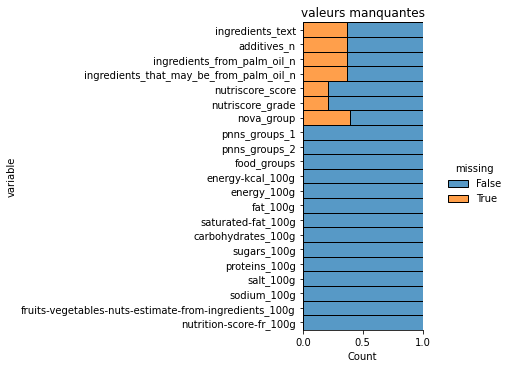

In [47]:
plt.figure(figsize=(15,12))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title('valeurs manquantes')
plt.show()

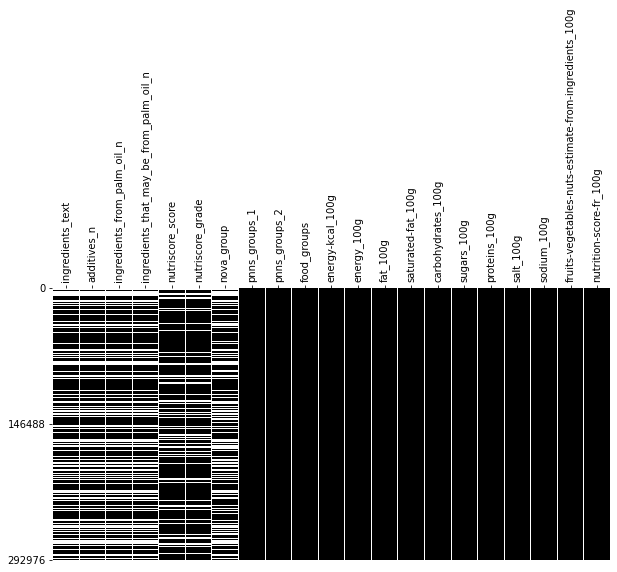

In [48]:
msn_matrix(df)

In [49]:
#on enregistre NAN = median des food_groups 
df.to_csv('/content/drive/MyDrive/OC: Data Science/Datasets/Projet 3/mediandata.csv', index=False)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292976 entries, 0 to 292975
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count   Dtype   
---  ------                                                 --------------   -----   
 0   ingredients_text                                       184186 non-null  object  
 1   additives_n                                            184186 non-null  float64 
 2   ingredients_from_palm_oil_n                            184186 non-null  float64 
 3   ingredients_that_may_be_from_palm_oil_n                184186 non-null  float64 
 4   nutriscore_score                                       231587 non-null  float64 
 5   nutriscore_grade                                       231587 non-null  category
 6   nova_group                                             176925 non-null  category
 7   pnns_groups_1                                          292976 non-null  category
 8   pnns_groups_2           

# Analyse des valeurs aberrantes 

In [51]:
df1 = pd.read_csv('/content/drive/MyDrive/OC: Data Science/Datasets/Projet 3/mediandata.csv')

In [52]:
df1.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
count,184186.000000,184186.000000,184186.000000,231587.000000,176925.000000,292976.000000,292976.000000,292976.000000,292976.000000,292976.000000,292976.000000,292976.000000,292976.000000,292976.000000,292976.000000,292976.000000
mean,2.035258,0.019334,0.070049,9.036518,3.327472,271.344080,1131.220276,13.464523,5.022678,25.396781,11.966920,7.894362,1.185853,0.474516,5.685927,9.238484
std,2.936651,0.139536,0.308315,8.975043,1.012143,196.465912,837.073754,18.362137,8.837570,27.133545,18.540921,9.294030,16.384021,6.553568,31.603455,7.989230
min,0.000000,0.000000,0.000000,-15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,125.000000,485.000000,1.200000,0.300000,3.850000,0.900000,1.800000,0.100000,0.040000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,10.000000,4.000000,256.000000,1059.000000,6.900000,2.000000,13.000000,3.600000,5.800000,0.577500,0.231000,0.000000,10.000000
75%,3.000000,0.000000,0.000000,16.000000,4.000000,375.000000,1590.000000,19.900000,6.250000,48.000000,13.000000,10.910000,1.200000,0.480000,0.000000,14.000000
max,33.000000,2.000000,5.000000,40.000000,4.000000,27800.000000,116000.000000,1300.000000,1600.000000,1900.000000,340.000010,2000.000000,2470.000000,987.000000,13461.000000,40.000000


In [53]:
df1.shape

(292976, 21)

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292976 entries, 0 to 292975
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   ingredients_text                                       184186 non-null  object 
 1   additives_n                                            184186 non-null  float64
 2   ingredients_from_palm_oil_n                            184186 non-null  float64
 3   ingredients_that_may_be_from_palm_oil_n                184186 non-null  float64
 4   nutriscore_score                                       231587 non-null  float64
 5   nutriscore_grade                                       231587 non-null  object 
 6   nova_group                                             176925 non-null  float64
 7   pnns_groups_1                                          292976 non-null  object 
 8   pnns_groups_2                     

In [55]:
df1.columns

Index(['ingredients_text', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'food_groups', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [56]:
colon_g= [  'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g','fruits-vegetables-nuts-estimate-from-ingredients_100g']

enrg= ['energy-kcal_100g','energy_100g' ]
colon_cat = ['ingredients_text', 'additives_n', 'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2','food_groups']


### Traitement des Outliers

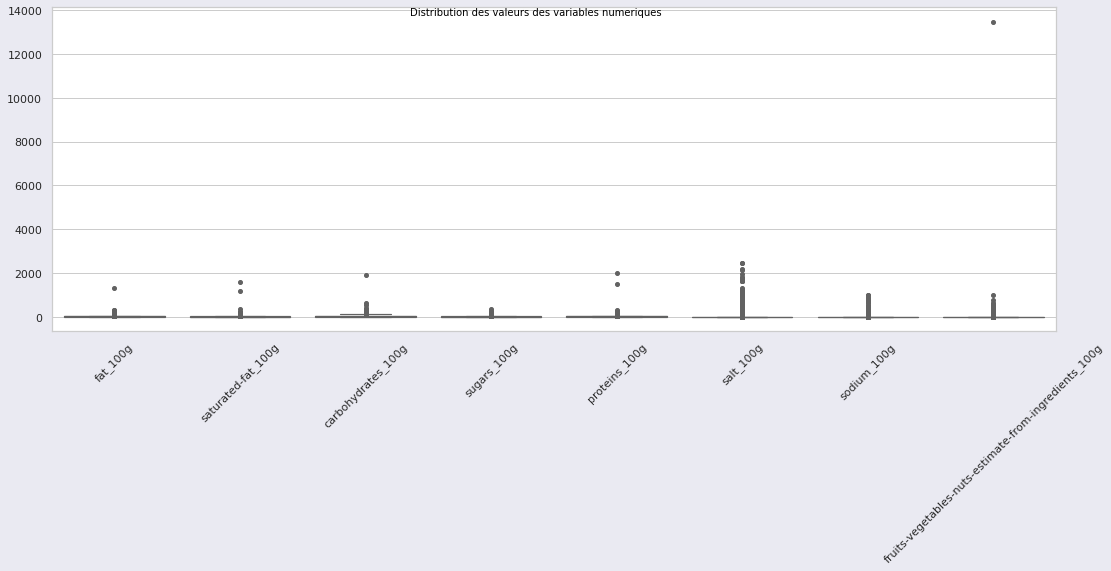

In [57]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(18, 12), facecolor=facecolor)

x = sns.boxplot(data=df1[colon_g],
                       palette='Set3',
                       linewidth=1.2,
                       fliersize=2,
                       flierprops=dict(marker='o', markersize=4))
plot = plt.setp(ax.get_xticklabels(), rotation=45)
title = 'Distribution des valeurs des variables numeriques '
fig.suptitle(title, y=0.50, fontsize=10, color='Black')

plt.subplots_adjust(top=0.50)
plt.savefig('Distribution des valeurs des variables numeriques.png')

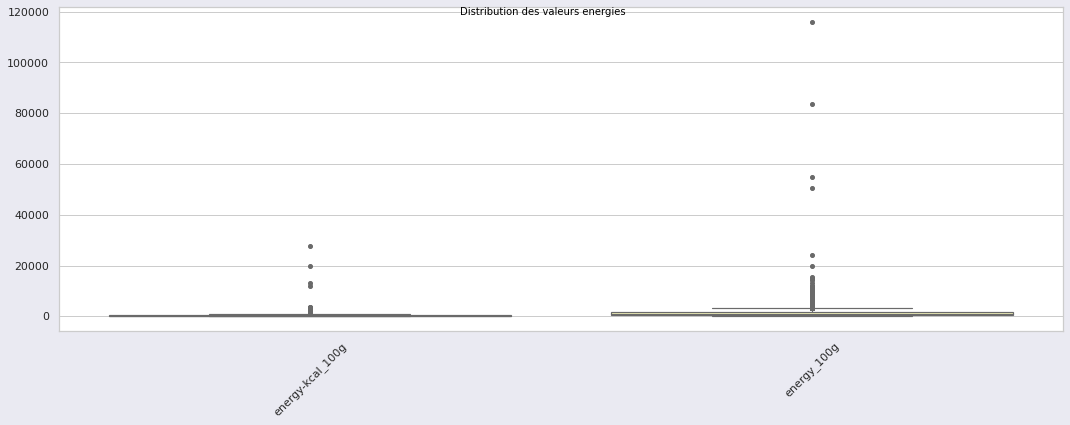

In [58]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(18, 12), facecolor=facecolor)

x = sns.boxplot(data=df1[enrg],
                       palette='Set3',
                       linewidth=1.2,
                       fliersize=2,
                       flierprops=dict(marker='o', markersize=4))
plot = plt.setp(ax.get_xticklabels(), rotation=45)
title = 'Distribution des valeurs energies '
fig.suptitle(title, y=0.50, fontsize=10, color='Black')

plt.subplots_adjust(top=0.50)
plt.savefig('Distribution des valeurs energies.png')

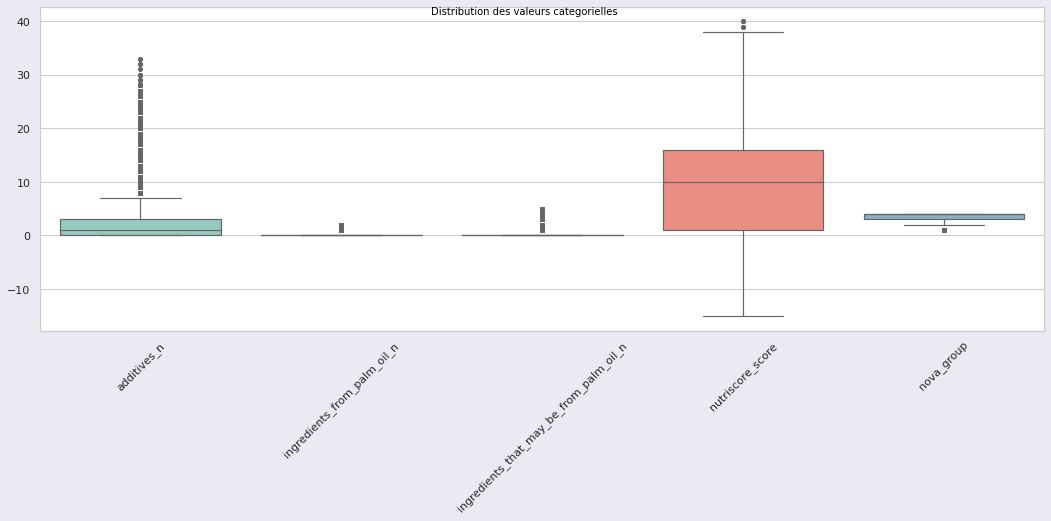

In [59]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(18, 12), facecolor=facecolor)

x = sns.boxplot(data=df1[colon_cat],
                       palette='Set3',
                       linewidth=1.2,
                       fliersize=2,
                       flierprops=dict(marker='o', markersize=4))
plot = plt.setp(ax.get_xticklabels(), rotation=45)
title = 'Distribution des valeurs categorielles '
fig.suptitle(title, y=0.50, fontsize=10, color='Black')

plt.subplots_adjust(top=0.50)
plt.savefig('Distribution des valeurs categorielles.png')

In [80]:
# remplacement des outliers
def impute_outliers(df, feature):
        #Quartile inférieur (25%)
      Q1 = df[feature].quantile(q=0.25)
                   
        #Quartile supérieur (75%)
      Q3 = df[feature].quantile(q=0.75)
        # Ecart interquintile          
      IQR = Q3 - Q1

      lower_bound = Q1 - 1.5*IQR
      upper_bound = Q3 + 1.5*IQR

      df.loc[df[feature] < lower_bound] = lower_bound
      df.loc[df[feature] > upper_bound] = upper_bound

      

In [81]:
for feature in features:
  impute_outliers(df1, feature)

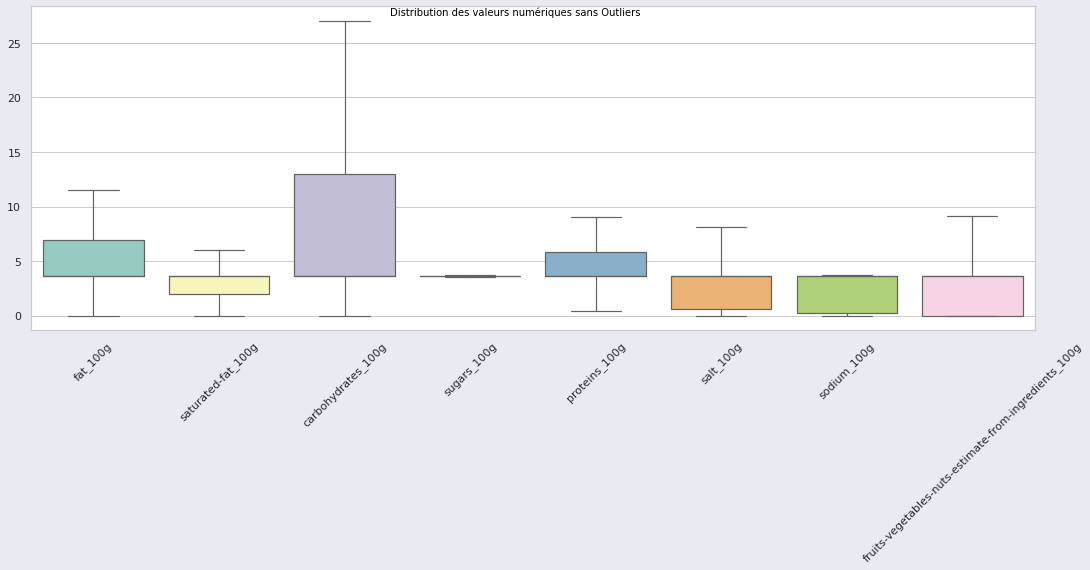

In [82]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(18, 12), facecolor=facecolor)

x = sns.boxplot(data=df1[colon_g],
                       palette='Set3',
                       linewidth=1.2,
                       fliersize=2,
                       flierprops=dict(marker='o', markersize=4))
plot = plt.setp(ax.get_xticklabels(), rotation=45)
title = 'Distribution des valeurs numériques sans Outliers '
fig.suptitle(title, y=0.50, fontsize=10, color='Black')

plt.subplots_adjust(top=0.50)
plt.savefig('distribution des valeurs numériques sans outliers.png')

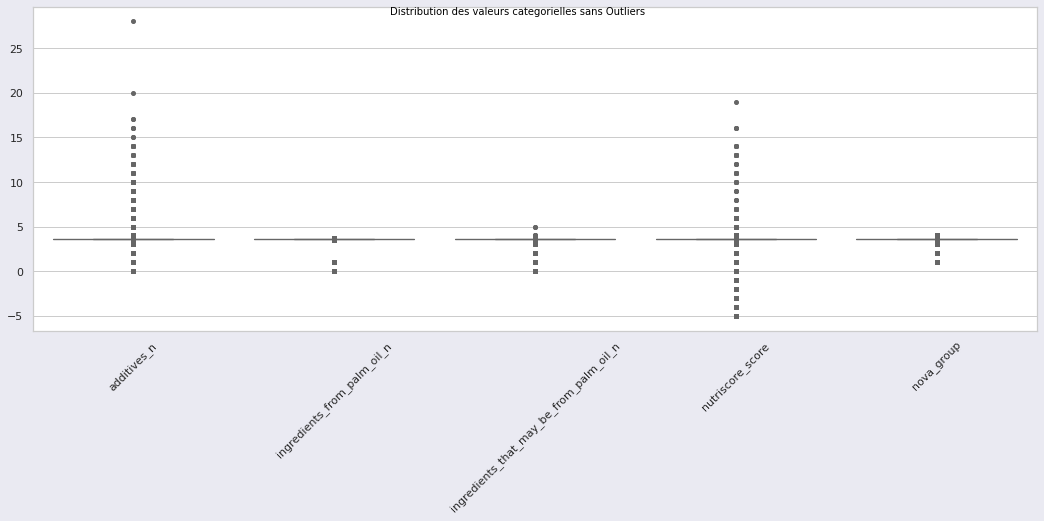

In [85]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(18, 12), facecolor=facecolor)

x = sns.boxplot(data=df1[colon_cat],
                       palette='Set3',
                       linewidth=1.2,
                       fliersize=2,
                       flierprops=dict(marker='o', markersize=4))
plot = plt.setp(ax.get_xticklabels(), rotation=45)
title = 'Distribution des valeurs categorielles sans Outliers '
fig.suptitle(title, y=0.50, fontsize=10, color='Black')

plt.subplots_adjust(top=0.50)
plt.savefig('distribution des valeurs categorielles sans outliers.png')

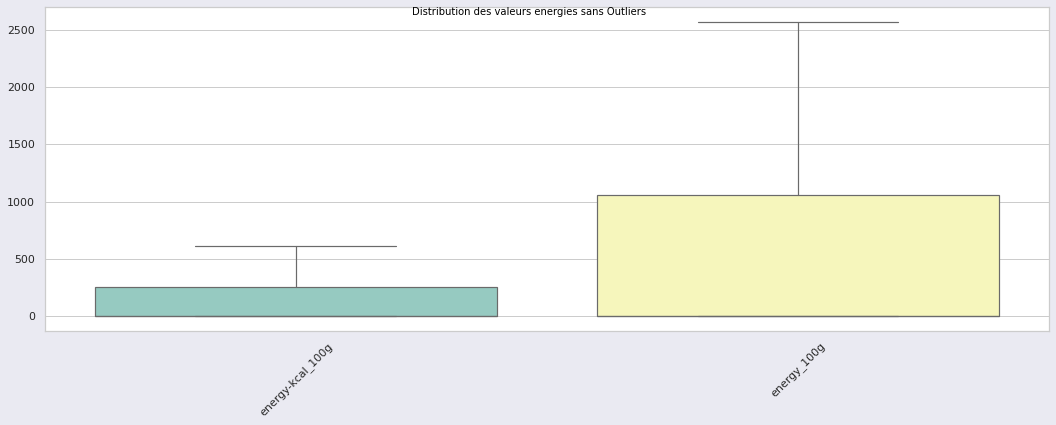

In [84]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(18, 12), facecolor=facecolor)

x = sns.boxplot(data=df1[enrg],
                       palette='Set3',
                       linewidth=1.2,
                       fliersize=2,
                       flierprops=dict(marker='o', markersize=4))
plot = plt.setp(ax.get_xticklabels(), rotation=45)
title = 'Distribution des valeurs energies sans Outliers '
fig.suptitle(title, y=0.50, fontsize=10, color='Black')

plt.subplots_adjust(top=0.50)
plt.savefig('distribution des valeurs energies sans outliers.png')

In [65]:
df1['energy-kcal_100g'].describe()

count    292976.000000
mean        136.159131
std         143.840760
min          -5.892188
25%           3.643125
50%          81.000000
75%         256.000000
max         748.000000
Name: energy-kcal_100g, dtype: float64

### Traitement des valeurs aberrantes

Remplacement des valeurs aberrantes par des nan, dans la suite on utilsera iterrative imputer pour les remplacer.

In [66]:
#remplacement des valeurs aberrantes
def replace_ab(df, feature):
  Q1 = df[feature].quantile(q=0.25)
  Q3 = df[feature].quantile(q=0.75)
  IQR = Q3 - Q1

  seuil = 1.5 * (Q3-Q1)

  df.loc[df[feature] < Q1 - seuil] = np.nan
  df.loc[df[feature] > Q3 + seuil] = np.nan

In [67]:
for feature in features:
  replace_ab(df1, feature)

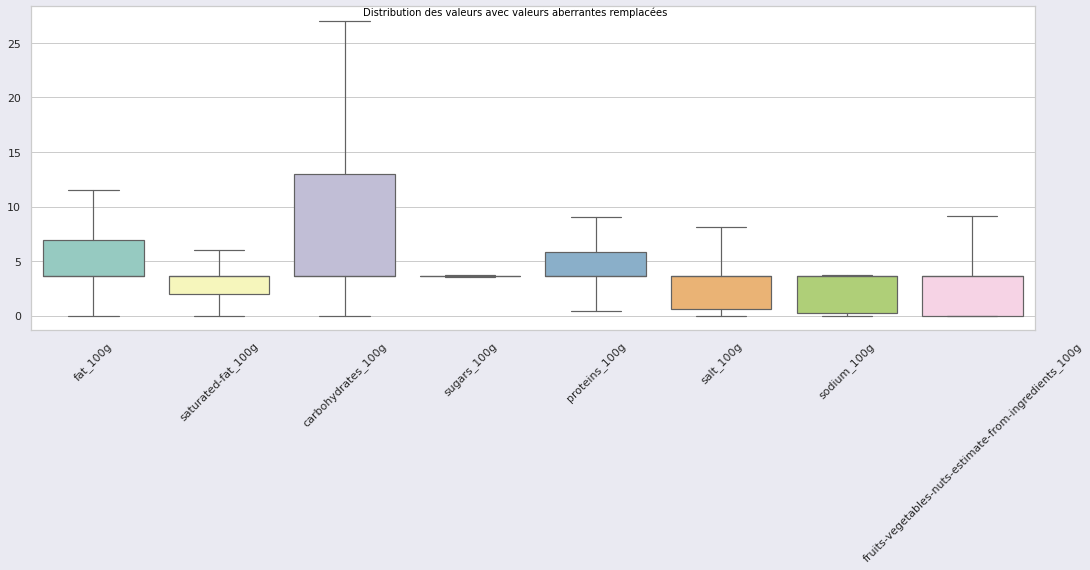

In [86]:
sns.set(style='whitegrid')
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(18, 12), facecolor=facecolor)

x = sns.boxplot(data=df1[colon_g],
                       palette='Set3',
                       linewidth=1.2,
                       fliersize=2,
                       flierprops=dict(marker='o', markersize=4))
plot = plt.setp(ax.get_xticklabels(), rotation=45)
title = 'Distribution des valeurs avec valeurs aberrantes remplacées '
fig.suptitle(title, y=0.50, fontsize=10, color='Black')

plt.subplots_adjust(top=0.50)
plt.savefig('distribution des valeurs avec  valeurs aberrantes remplacées.png')

In [69]:
df1.isnull().sum()

ingredients_text                                         207437
additives_n                                              207437
ingredients_from_palm_oil_n                              207437
ingredients_that_may_be_from_palm_oil_n                  207437
nutriscore_score                                         210558
nutriscore_grade                                         210558
nova_group                                               207919
pnns_groups_1                                            177835
pnns_groups_2                                            177835
food_groups                                              177855
energy-kcal_100g                                         177835
energy_100g                                              177835
fat_100g                                                 177835
saturated-fat_100g                                       177835
carbohydrates_100g                                       177835
sugars_100g                             

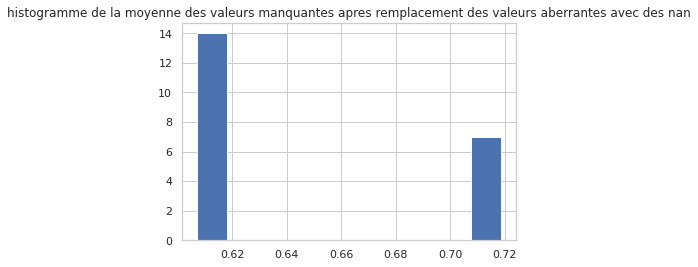

In [70]:
plt.hist(df1.isnull().mean())
plt.title('histogramme de la moyenne des valeurs manquantes apres remplacement des valeurs aberrantes avec des nan')
plt.savefig("histogramme de la moyenne des valeurs manquantes apres remplacement des valeurs aberrantes avec des nan.png")
plot=plt.show()

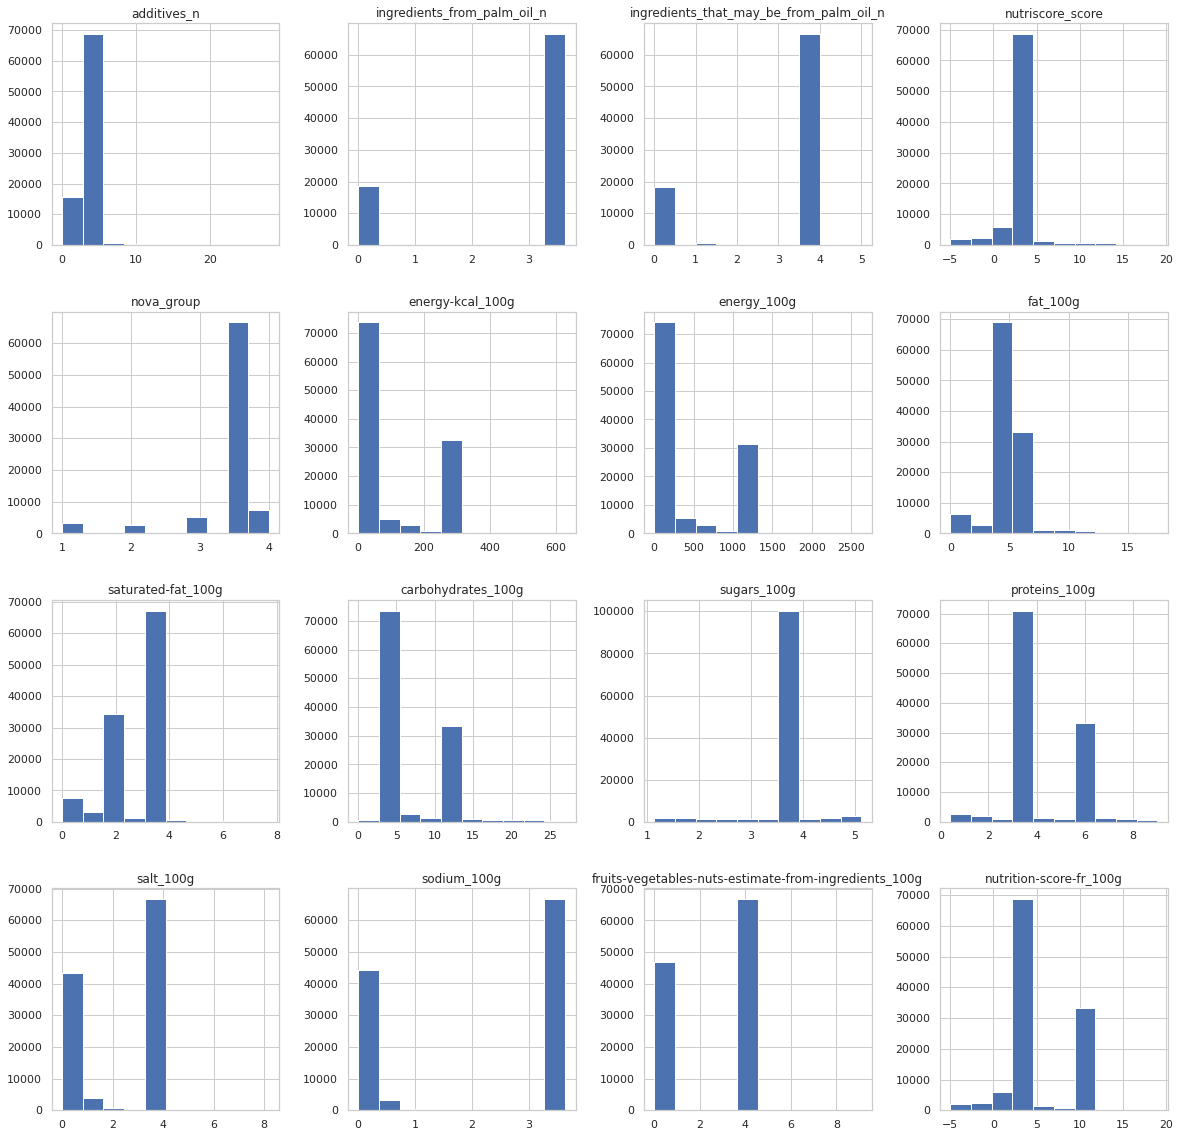

In [71]:
p = df1.hist(figsize = (20,20))
plt.savefig('histogramme des valeurs.png')

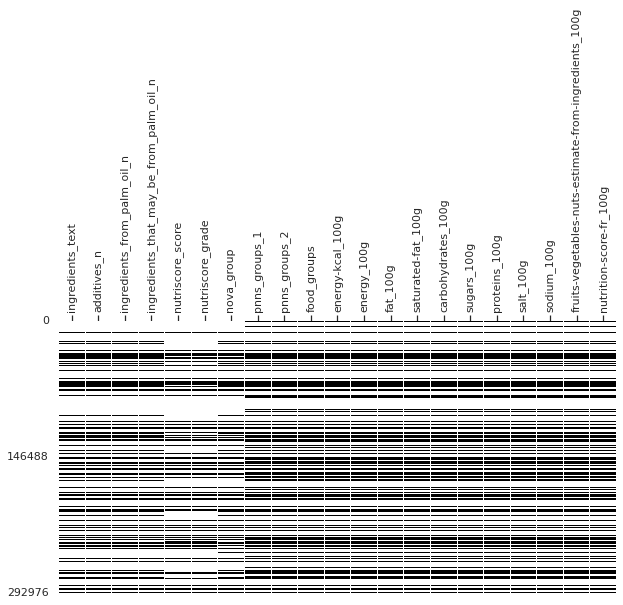

In [72]:
msn_matrix(df1)

In [73]:
df1.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
count,85539.000000,85539.000000,85539.000000,82418.000000,85057.000000,115141.000000,115141.000000,115141.000000,115141.000000,115141.000000,115141.000000,115141.000000,115141.000000,115141.000000,115141.000000,115141.000000
mean,3.102231,2.840128,2.848253,3.300962,3.482156,86.798940,346.962699,4.616090,2.865029,6.929838,3.575961,4.266314,2.373984,2.214828,2.192318,5.204825
std,1.451341,1.508741,1.497516,1.964224,0.604050,112.978701,468.430796,2.092662,1.114181,4.671761,0.483222,1.298507,1.544639,1.682611,1.848333,3.448348
min,0.000000,0.000000,0.000000,-5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.140000,0.410000,0.000000,0.000000,0.000000,-5.000000
25%,3.643125,3.643125,3.643125,3.643125,3.643125,3.643125,3.643125,3.643125,2.000000,3.643125,3.600000,3.643125,0.577500,0.231000,0.000000,3.643125
50%,3.643125,3.643125,3.643125,3.643125,3.643125,3.643125,3.643125,3.643125,3.643125,3.643125,3.643125,3.643125,3.643125,3.643125,3.643125,3.643125
75%,3.643125,3.643125,3.643125,3.643125,3.643125,256.000000,1059.000000,6.900000,3.643125,13.000000,3.643125,5.800000,3.643125,3.643125,3.643125,10.000000
max,28.000000,3.643125,5.000000,19.000000,4.000000,628.000000,2628.000000,17.500000,7.714300,27.000000,5.130000,9.030000,8.200000,3.643125,9.090909,19.000000


In [74]:
valeurs_manquantes(df1)

le total des valeurs manquantes est 3948493
ingredients_text                                         70.80
additives_n                                              70.80
ingredients_from_palm_oil_n                              70.80
ingredients_that_may_be_from_palm_oil_n                  70.80
nutriscore_score                                         71.87
nutriscore_grade                                         71.87
nova_group                                               70.97
pnns_groups_1                                            60.70
pnns_groups_2                                            60.70
food_groups                                              60.71
energy-kcal_100g                                         60.70
energy_100g                                              60.70
fat_100g                                                 60.70
saturated-fat_100g                                       60.70
carbohydrates_100g                                       60.70
sugars_100g

<Figure size 1080x864 with 0 Axes>

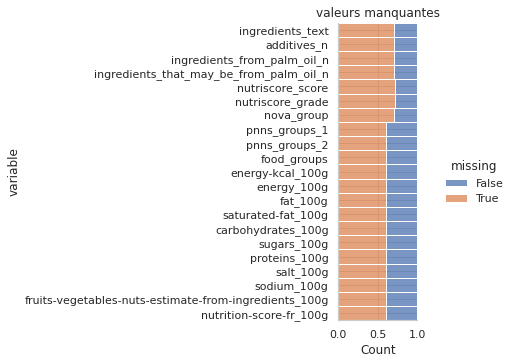

In [75]:
plt.figure(figsize=(15,12))
sns.displot(
    data=df1.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title('valeurs manquantes')
plt.show()

In [76]:
#fichier CSV les valeurs aberrantes 
new_data.to_csv('/content/drive/MyDrive/OC: Data Science/Datasets/Projet 3/data.csv', index=False)